In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv("iris.csv")

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (150, 5)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()

Mapping on data shaped (150, 5) using lens shaped (150, 2)

Minimal points in hypercube before clustering: 3
Creating 25 hypercubes.
   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

Cube_3 is empty.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.


Created 174 edges and 72 nodes in 0:0

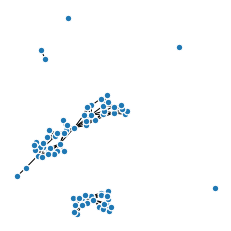

In [20]:
import sys
try:
    import pandas as pd
except ImportError as e:
    print("pandas is required for this example. Please install with `pip install pandas` and then try again.")
    sys.exit()

import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble


feature_names = [c for c in df.columns]
X = np.array(df[feature_names])  # quick and dirty imputation
i = np.array(df["Column5"])


data_from_cluster_id(cluster_id, graph, df)

# We create a custom 1-D lens with Isolation Forest
model = ensemble.IsolationForest(random_state=1729)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

# We create another 1-D lens with L2-norm
mapper = km.KeplerMapper(verbose=3)
lens2 = mapper.fit_transform(X, projection="l2norm")

# Combine both lenses to create a 2-D [Isolation Forest, L^2-Norm] lens
lens = np.c_[lens1, lens2]

# Create the simplicial complex
graph = mapper.map(lens,
                   X,
                   cover=km.Cover(n_cubes=5, perc_overlap=0.5),
                   clusterer=sklearn.cluster.KMeans(n_clusters=3,
                                                    random_state=9999))


# Visualization
from kmapper import jupyter
html = mapper.visualize(graph, path_html="kmapper-example1.html", nbins=15, custom_tooltips = i, color_function = i)
jupyter.display(path_html="kmapper-example1.html")

import matplotlib.pyplot as plt
km.draw_matplotlib(graph)
plt.show()

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (150, 5)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()

Mapping on data shaped (150, 5) using lens shaped (150, 2)

Minimal points in hypercube before clustering: 5
Creating 225 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

Cube_8 is empty.

Cube_9 is empty.

Cube_10 is empty.

Cube_11 is empty.

Cube_12 is empty.

Cube_13 is empty.

Cube_14 is empty.

Cube_15 is empty.

Cube_16 is empty.

Cube_17 is empty.

Cube_18 is empty.

Cube_19 is empty.

Cube_20 is empty.

Cube_21 is empty.

Cube_22 is empty.

Cube_23 is empty.

Cube_24 is empty.

Cube_25 is empty.

Cube_26 is empty.

Cube_27 is empty.

Cube_28 is empty.

Cube_29 is empty.

Cube_30 is empty.

Cube_31 is empty.

Cube_32 is empty.

Cube_33 is emp

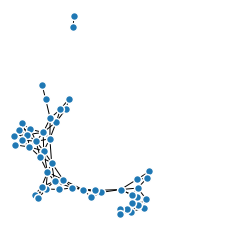

In [7]:
import sys
try:
    import pandas as pd
except ImportError as e:
    print("pandas is required for this example. Please install with `pip install pandas` and then try again.")
    sys.exit()

import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble


feature_names = [c for c in df.columns]
X = np.array(df[feature_names])  # quick and dirty imputation


# We create a custom 1-D lens with Isolation Forest
model = ensemble.IsolationForest(random_state=1729)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

# We create another 1-D lens with L2-norm
mapper = km.KeplerMapper(verbose=3)
lens2 = mapper.fit_transform(X, projection="l2norm")

# Combine both lenses to create a 2-D [Isolation Forest, L^2-Norm] lens
lens = np.c_[lens1, lens2]

# Use DBSCAN with "cosine"-distance
graph = mapper.map(lens,
                   X,
                   cover=km.Cover(n_cubes=15, perc_overlap=0.5),
                   clusterer=sklearn.cluster.DBSCAN(metric="cosine"))


# Visualization
from kmapper import jupyter
html = mapper.visualize(graph, path_html="kmapper-example2.html")
jupyter.display(path_html="kmapper-example2.html")

import matplotlib.pyplot as plt
km.draw_matplotlib(graph)
plt.show()

In [1]:
# Import the class
import kmapper as km

# Some sample data
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, nr_cubes=10)

# Visualize it
from kmapper import jupyter
html = mapper.visualize(graph, path_html="kmapper-example4.html")
jupyter.display(path_html="kmapper-example4.html")

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (5000, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (5000, 2) using lens shaped (5000, 2)

Creating 100 hypercubes.

Created 89 edges and 57 nodes in 0:00:00.119682.


Wrote visualization to: kmapper-example4.html


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
